In [2]:
# Importação dos pacotes necessários
    
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df_init = pd.read_csv('balanco_mensal.csv', delimiter=';', encoding="utf-8")
df_gera = df_init
df_gera.head()

# converter 'energia(mwh)' para int64
df_gera['energia(mwh)'] = df_init['energia(mwh)'].str.replace(',', '').astype('int64')

#Características das variáveis do dataset
df_gera.info()

#Estatísticas univariadas
df_gera.describe()

#Checando missing values
missing = df_gera.isna().any()
print("Columns with missing values:")
print(missing)

,ano,data,balanco,tipo,energia(mwh),Ano,Mês,Horas,energia(mwmed)
0,2020,01/01/2020,OFERTA,Hidráulica,"3,023,860",2020,1,744,"4,064"
1,2020,01/01/2020,OFERTA,Importacion,"26,786",2020,1,744,36
2,2020,01/01/2020,OFERTA,Nuclear,"791,101",2020,1,744,"1,063"
3,2020,01/01/2020,OFERTA,Renovable,"957,836",2020,1,744,"1,287"
4,2020,01/01/2020,OFERTA,Térmica,"7,659,865",2020,1,744,"10,296"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ano             462 non-null    int64 
 1   data            462 non-null    object
 2   balanco         462 non-null    object
 3   tipo            462 non-null    object
 4   energia(mwh)    462 non-null    int64 
 5   Ano             462 non-null    int64 
 6   Mês             462 non-null    int64 
 7   Horas           462 non-null    int64 
 8   energia(mwmed)  462 non-null    object
dtypes: int64(5), object(4)
memory usage: 32.6+ KB


,ano,energia(mwh),Ano,Mês,Horas
count,462.000000,4.620000e+02,462.000000,462.000000,462.000000
mean,2021.285714,2.158930e+06,2021.285714,6.071429,729.714286
std,1.031274,3.031422e+06,1.031274,3.429059,20.345939
min,2020.000000,0.000000e+00,2020.000000,1.000000,672.000000
25%,2020.000000,7.275175e+04,2020.000000,3.000000,720.000000
50%,2021.000000,8.856720e+05,2021.000000,6.000000,744.000000
75%,2022.000000,2.054144e+06,2022.000000,9.000000,744.000000
max,2023.000000,1.194405e+07,2023.000000,12.000000,744.000000


Columns with missing values:
ano               False
data              False
balanco           False
tipo              False
energia(mwh)      False
Ano               False
Mês               False
Horas             False
energia(mwmed)    False
dtype: bool


In [4]:
df_temp = pd.read_csv('df_temperatura.csv', delimiter=',', encoding="utf-8")
df_temp.info()
df_temp.head()
#Checando missing values
missing = df_temp.isna().any()
print("Columns with missing values:")
print(missing)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          1198 non-null   object 
 1   temp_arg      1198 non-null   float64
 2   temp_arg_min  1197 non-null   float64
 3   temp_arg_max  1197 non-null   float64
dtypes: float64(3), object(1)
memory usage: 37.6+ KB


,data,temp_arg,temp_arg_min,temp_arg_max
0,2020-05-01,14.7,9.800000,19.600000
1,2020-05-02,12.7,8.466667,16.933333
2,2020-05-03,16.2,10.800000,21.600000
3,2020-05-04,13.7,9.133333,18.266667
4,2020-05-05,13.3,8.866667,17.733333


Columns with missing values:
data            False
temp_arg        False
temp_arg_min     True
temp_arg_max     True
dtype: bool


In [5]:
# Inverter ordem das colunas para ter data mais atualizada primeiro

df_gera['data'] = pd.to_datetime(df_gera['data'], format='%d/%m/%Y')
df_temp['data'] = pd.to_datetime(df_temp['data'], format='%Y-%m-%d')
df_grouped = df_gera.groupby('data')
df_grouped = df_grouped.sum().sort_values(by='data', ascending=False)


#Juntando ambos dataframes
df_merge = df_temp.merge(df_grouped[['energia(mwh)']], on='data', how='right')

# Reordernando colunas
df_gera = df_merge[['data', 'energia(mwh)', 'temp_arg', 'temp_arg_min', 'temp_arg_max']]

df_gera.head()
df_gera.describe()


,data,energia(mwh),temp_arg,temp_arg_min,temp_arg_max
0,2023-06-01,25120981,17.0,11.333333,16.000000
1,2023-05-01,22498149,12.1,8.066667,20.000000
2,2023-04-01,21023047,26.2,17.466667,20.000000
3,2023-03-01,29240968,31.6,21.066667,23.000000
4,2023-02-01,24958518,24.5,16.333333,32.666667


,energia(mwh),temp_arg,temp_arg_min,temp_arg_max
count,4.200000e+01,38.000000,38.000000,38.000000
mean,2.374822e+07,16.134211,10.756140,20.542105
std,2.424297e+06,6.281086,4.187391,7.279840
min,1.816191e+07,4.900000,3.266667,6.533333
25%,2.209155e+07,11.575000,7.716667,15.400000
50%,2.337416e+07,15.600000,10.400000,20.266667
75%,2.550127e+07,19.775000,13.183333,25.266667
max,2.924097e+07,31.600000,21.066667,34.800000


In [6]:
#Verificamos presença de missing values e valores nulos no dataset

#removendo missing values
df_gera.dropna(inplace=True)

#removendo valores nulos
df_gera.rename(columns = {'energia(mwh)':'energia'},inplace=True)

# Removing null values in the 'energia' column
df_gera = df_gera[df_gera['energia'].notnull()]

df_gera.describe()

,energia,temp_arg,temp_arg_min,temp_arg_max
count,3.800000e+01,38.000000,38.000000,38.000000
mean,2.390490e+07,16.134211,10.756140,20.542105
std,2.358418e+06,6.281086,4.187391,7.279840
min,2.032962e+07,4.900000,3.266667,6.533333
25%,2.209155e+07,11.575000,7.716667,15.400000
50%,2.337416e+07,15.600000,10.400000,20.266667
75%,2.557172e+07,19.775000,13.183333,25.266667
max,2.924097e+07,31.600000,21.066667,34.800000


,energia,temp_arg,temp_arg_min,temp_arg_max
energia,1.000000,0.161975,0.161975,0.072039
temp_arg,0.161975,1.000000,1.000000,0.874022
temp_arg_min,0.161975,1.000000,1.000000,0.874022
temp_arg_max,0.072039,0.874022,0.874022,1.000000


<Figure size 1500x1000 with 0 Axes>

<AxesSubplot: >

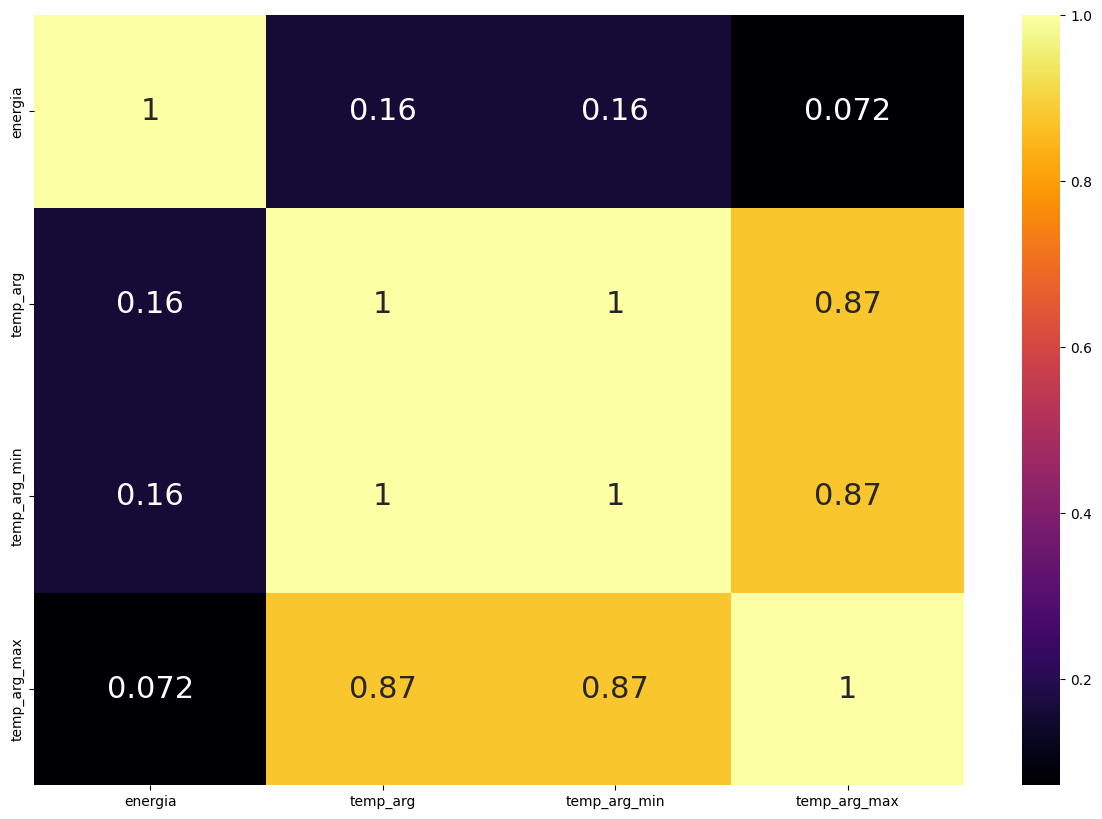

In [7]:
# Matriz de correlações
#dropando coluna date
df_corr = df_gera.drop(columns='data')
# Calculate the correlation matrix
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.inferno,
            annot_kws={'size':22})
plt.show()

"temp_arg" e "temp_arg_min" com correlação perfeita. Um dos dois pode ser excluído do modelo

In [8]:
# Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_OLS = sm.OLS.from_formula("energia ~ temp_arg + temp_arg_max", df_gera).fit()

#Parâmetros do modelo
modelo_OLS.summary()

#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_OLS.conf_int(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                energia   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8575
Date:                Sun, 27 Aug 2023   Prob (F-statistic):              0.433
Time:                        02:24:38   Log-Likelihood:                -610.10
No. Observations:                  38   AIC:                             1226.
Df Residuals:                      35   BIC:                             1231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.332e+07   1.17e+06     19.997      0.000     2.1e+07    2.57e+07
temp_arg      1.575e+05   1.28e+05      1.235      0.225   -1.01e+05    4.16e+05
temp_arg_max -9.541e+04    1.1e+05     -0.867      0.392   -3.19e+05    1.28e+05
==============================================================================
Omnibus:                        2.787   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                1.470
Skew:                           0.120   Prob(JB):                        0.479
Kurtosis:                       2.067   Cond. No.                         84.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,0,1
Intercept,2.095627e+07,2.569213e+07
temp_arg,-1.014383e+05,4.163807e+05
temp_arg_max,-3.188010e+05,1.279760e+05


## temp_arg_max e temp_arg não estatísticamente significante como uma variável explicativa. Então vamos excluí-los

In [9]:
# Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#xt é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
xt, lmbda = boxcox(df_gera['energia'])

print("Primeiros valores: ",xt[:5])
print("Lambda: ",lmbda)

Primeiros valores:  [0.72571041 0.72571041 0.72571041 0.72571041 0.72571041]
Lambda:  -1.377960108232826


In [10]:
df_gera['bc_energia'] = xt
df_gera

,data,energia,temp_arg,temp_arg_min,temp_arg_max,bc_energia
0,2023-06-01,25120981,17.0,11.333333,16.000000,0.72571
1,2023-05-01,22498149,12.1,8.066667,20.000000,0.72571
2,2023-04-01,21023047,26.2,17.466667,20.000000,0.72571
3,2023-03-01,29240968,31.6,21.066667,23.000000,0.72571
4,2023-02-01,24958518,24.5,16.333333,32.666667,0.72571
5,2023-01-01,28477624,21.6,14.400000,28.800000,0.72571
6,2022-12-01,27305423,19.9,13.266667,26.533333,0.72571
7,2022-11-01,23783407,12.8,8.533333,17.066667,0.72571
8,2022-10-01,21520264,15.2,10.133333,20.266667,0.72571
9,2022-09-01,21491014,15.2,10.133333,20.266667,0.72571


In [11]:
# Estimando um novo modelo múltiplo com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_energia ~  temp_arg + temp_arg_max', df_gera).fit()

# Parâmetros do modelo
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_energia   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.4944
Date:                Sun, 27 Aug 2023   Prob (F-statistic):              0.614
Time:                        02:24:41   Log-Likelihood:                 925.24
No. Observations:                  38   AIC:                            -1844.
Df Residuals:                      35   BIC:                            -1840.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7257   3.31e-12   2.19e+11      0.000       0.726       0.726
temp_arg      3.302e-13   3.62e-13      0.912      0.368   -4.04e-13    1.06e-12
temp_arg_max  -1.89e-13   3.12e-13     -0.605      0.549   -8.23e-13    4.45e-13
==============================================================================
Omnibus:                        4.271   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                1.802
Skew:                          -0.118   Prob(JB):                        0.406
Kurtosis:                       1.960   Cond. No.                         84.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## temp_arg_max e temp_arg não estatísticamente significante como uma variável explicativa. Então vamos excluí-los

In [12]:
# Preparar dados para modelo OLS quadratico
xdata = df_gera['temp_arg']
ydata = df_gera['energia']


# Create a DataFrame for the statsmodels OLS
data = {'ydata': ydata, 'xdata': xdata}
df = pd.DataFrame(data)

# Fit the OLS model using statsmodels
modelo_qd = sm.OLS.from_formula('ydata ~ xdata + np.power(xdata, 2)', data=df).fit()
# Parâmetros do modelo
modelo_qd.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ydata   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5.195
Date:                Sun, 27 Aug 2023   Prob (F-statistic):             0.0106
Time:                        02:24:43   Log-Likelihood:                -606.07
No. Observations:                  38   AIC:                             1218.
Df Residuals:                      35   BIC:                             1223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.839e+07   2.04e+06     13.896      0.000    2.42e+07    3.25e+07
xdata              -6.856e+05   2.52e+05     -2.717      0.010    -1.2e+06   -1.73e+05
np.power(xdata, 2)  2.202e+04   7261.183      3.033      0.005    7281.412    3.68e+04
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.267
Skew:                           0.077   Prob(JB):                        0.875
Kurtosis:                       2.620   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot: xlabel='temp_arg', ylabel='energia'>

<AxesSubplot: xlabel='temp_arg', ylabel='energia'>

<AxesSubplot: xlabel='temp_arg', ylabel='energia'>

Text(0.5, 1.0, 'Dados dispersos - modelo quadrático')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

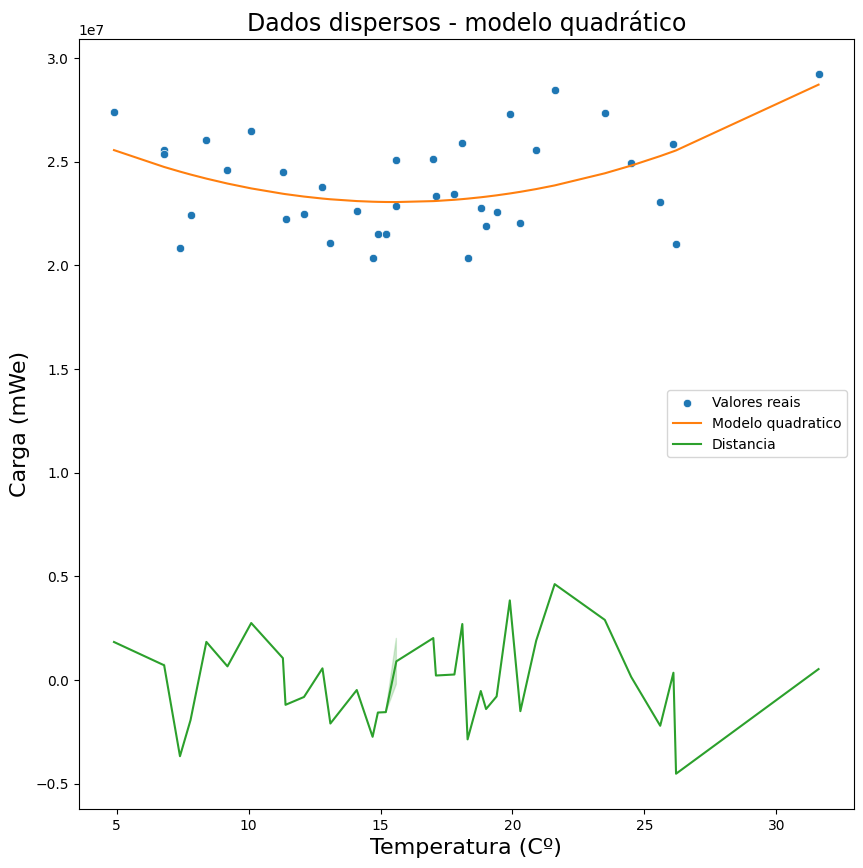

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="temp_arg", y="energia", data=df_gera, color='#1f77b4', label='Valores reais')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=modelo_qd.fittedvalues.to_numpy(), color='#ff7f0e', label='Modelo quadratico')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=df_gera['energia'].to_numpy() - modelo_qd.fittedvalues.to_numpy(), color='#2ca02c', label='Distancia')
plt.title('Dados dispersos - modelo quadrático', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.legend()
plt.show()

In [14]:
df_gera['yhat_qd'] = (modelo_qd.fittedvalues)

#Visualizando os dois fitted values no dataset
#modelos 'modelo_step_empresas e modelo_step_empresas_bc
df_gera[['data','energia','temp_arg', 'yhat_qd']]

,data,energia,temp_arg,yhat_qd
0,2023-06-01,25120981,17.0,2.309713e+07
1,2023-05-01,22498149,12.1,2.331626e+07
2,2023-04-01,21023047,26.2,2.554246e+07
3,2023-03-01,29240968,31.6,2.871401e+07
4,2023-02-01,24958518,24.5,2.480982e+07
5,2023-01-01,28477624,21.6,2.385380e+07
6,2022-12-01,27305423,19.9,2.346560e+07
7,2022-11-01,23783407,12.8,2.322021e+07
8,2022-10-01,21520264,15.2,2.305474e+07
9,2022-09-01,21491014,15.2,2.305474e+07


In [15]:
# Verificando a normalidade dos resíduos do 'modelo_OLS' e 'modelo_bc2'
from scipy.stats import shapiro
# Teste de Shapiro-Francia
sf_test_ols = shapiro(modelo_OLS.resid.to_numpy())
sf_test_qd = shapiro(modelo_qd.resid.to_numpy())
sf_test_bc = shapiro(modelo_bc.resid.to_numpy())

print("p-value ols:", sf_test_ols.pvalue)
print("p-value bc:", sf_test_bc.pvalue)
print("p-value qd:", sf_test_qd.pvalue)

p-value ols: 0.4701949656009674
p-value bc: 0.22091035544872284
p-value qd: 0.9885318875312805


<Figure size 1000x600 with 0 Axes>

(array([5.75634050e-08, 5.75634050e-08, 0.00000000e+00, 1.15126810e-07,
        0.00000000e+00, 1.72690215e-07, 2.87817025e-07, 5.75634050e-08,
        2.30253620e-07, 5.75634050e-08, 2.30253620e-07, 2.87817025e-07,
        5.75634050e-08, 1.15126810e-07, 1.72690215e-07, 1.15126810e-07,
        5.75634050e-08, 0.00000000e+00, 5.75634050e-08, 5.75634050e-08]),
 array([-4519416.68863513, -4062254.89469277, -3605093.10075041,
        -3147931.30680805, -2690769.5128657 , -2233607.71892334,
        -1776445.92498098, -1319284.13103862,  -862122.33709627,
         -404960.54315391,    52201.25078845,   509363.04473081,
          966524.83867316,  1423686.63261552,  1880848.42655788,
         2338010.22050024,  2795172.01444259,  3252333.80838495,
         3709495.60232731,  4166657.39626966,  4623819.19021202]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Resíduos')

Text(0, 0.5, 'Densidade')

Text(0.5, 1.0, 'Resíduos modelo quadrático')

Text(0.05, 0.7, 'Shapiro-Wilk p-value: 0.9885')

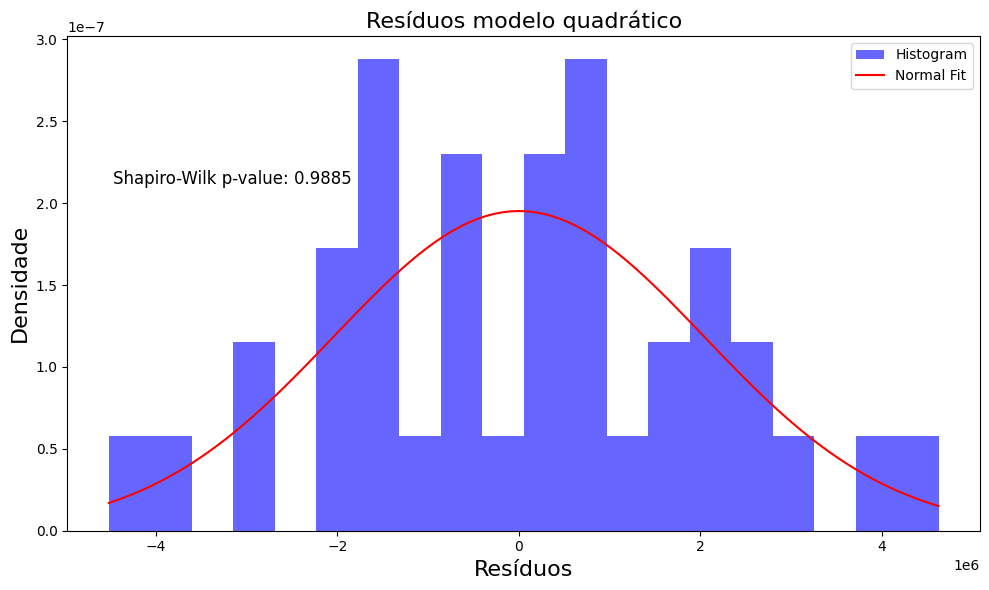

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, shapiro

# Resíduos dos modelos
resid_array_ols = modelo_OLS.resid.to_numpy()
resid_array_qd = modelo_qd.resid.to_numpy()
resid_array_bc = modelo_bc.resid.to_numpy()

# Create a single figure
plt.figure(figsize=(10, 6))

# Plot OLS Quadrático
plt.hist(resid_array_qd, bins=20, density=True, color='blue', alpha=0.6, label='Histogram')
x_range_qd = np.linspace(min(resid_array_qd), max(resid_array_qd), 100)
mu_qd, std_qd = norm.fit(resid_array_qd)
pdf_qd = norm.pdf(x_range_qd, mu_qd, std_qd)
plt.plot(x_range_qd, pdf_qd, label="Normal Fit", color='red')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Densidade', fontsize=16)
plt.title('Resíduos modelo quadrático', fontsize=16)

# Shapiro-Wilk test for normality
sf_test_qd = shapiro(resid_array_qd)
plt.annotate(f"Shapiro-Wilk p-value: {sf_test_qd.pvalue:.4f}",
             xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
# Resumo dos  três modelos obtidos
#(linear e com Box-Cox)

summary_col([modelo_OLS, modelo_bc, modelo_qd],
            model_names=["OLS","STEPWISE BOX-COX","QUADRATICO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,OLS,STEPWISE BOX-COX,QUADRATICO
Intercept,23324196.0844***,0.7257***,28387364.7488***
,(1166405.7125),(0.0000),(2042851.9745)
R-squared,0.0467,0.0275,0.2289
R-squared Adj.,-0.0078,-0.0281,0.1848
"np.power(xdata, 2)",,,22022.3966***
,,,(7261.1829)
temp_arg,157471.2062,0.0000,
,(127534.8340),(0.0000),
temp_arg_max,-95412.4875,-0.0000,
,(110037.7493),(0.0000),
